#Filtro de mediana

El filtro de mediana es un método para reducir el ruido de una imagen. La idea principal es sustituir el valor de cada pixel por la mediana de los pixeles que lo rodean. 

En la siguiente imagen, se muestra como funciona el filtro de mediana con una vecindad de $k \times k$ para $k = 3$. 

![](https://blitzman.gitbooks.io/cuda/assets/Picture1.png)

**Filtro de mediana para una imagen en blanco y negro.**

Parametros:
* img - Una matriz con los datos de la imagen.
* k   - El tamaño de la vecindad a considerar.

Salida:
* La imagen sin ruido.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Filtro de mediana para imagenes en escala de grises
def median_filter_gray(img, k):
  out = img.copy()
  alto, ancho = out.shape

  for renglon in range(k//2 , alto - k//2 -1):
    for columna in range(k//2, ancho - k//2 - 1):
      VentanaProximidad = create_window(out, k, renglon, columna)
      out[renglon][columna] = find_median(VentanaProximidad, k)
  
  return out

In [ ]:
#Regresa la mediana
def find_median(ventana, k):
  Pos_Med = (k * k)// 2
  v_plano = ventana.flatten() 
  v_plano.sort() 
  med = v_plano[Pos_Med]
  return med

In [ ]:
#Crea una ventana/submatriz de k x k
def create_window(img, k, i_actual, j_actual):
  Cuadrado = (k // 2)
  MatrizVentana = img[(i_actual - Cuadrado):(i_actual + Cuadrado + 1), (j_actual - Cuadrado):(j_actual + Cuadrado + 1)]
  
  return MatrizVentana

In [ ]:
# Igual que antes pero para imagenes a color.
def median_filter_rgb(img, k):
  out = img.copy()
  out[:, :, 0] = median_filter_gray(img[:, :, 0], k)
  out[:, :, 1] = median_filter_gray(img[:, :, 1], k)
  out[:, :, 2] = median_filter_gray(img[:, :, 2], k)
  return out

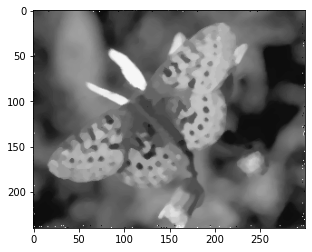

In [ ]:
img = cv2.imread('Borrosa3.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
k = 5

out = median_filter_gray(img, k)
plt.imshow(out, "gray")

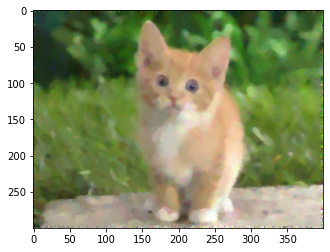

In [ ]:
img = cv2.imread('Borrosa4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
k = 5
 
out = median_filter_rgb(img, k)
plt.imshow(out)

---
#Kernels

También conocidos como *convolution mask*, son pequeñas submatrices que aplican efectos a las imágenes. Pueden aplicarse técnicas como *blur* (difuminar), *edge detection* (detección de bordes) y *sharpen* (afilar).

Para aplicarlo, tomamos una ventana de una matriz de dos dimensiones en la que cada pixel está representado por un numero en un rango de 0 a 255. 

Un ejemplo de cómo aplicar un kernel se ve en la siguiente imagen, donde a la matriz con letras es el kernel y la segunda una parte de la imagen. El proceso se hace multiplicando las posiciones con el mismo indice y sumando. Para el elemento en la posición [2,2] (elemento central) el resultado de la imagen será:
![texto alternativo](https://wikimedia.org/api/rest_v1/media/math/render/svg/570600fdeed436d98626278f22bf034ff5ab5162)


Para aplicar un kernel a una imagen, creamos una función con los siguientes parámetros:
*  img - Una imagen en blanco y negro.
*  kernel - Una matriz de k x k representando el kernel a aplicar.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Para imagenes en escala de grises
def convolution_gray(img, kernel):
  out = img.copy() 
  alto_img, ancho_img = out.shape
  alto_k, ancho_k = kernel.shape
  win = alto_k // 2
  
  for renglon in range(win, alto_img - win):
    for columna in range(win, ancho_img - win): 
      acumulador = 0
      subimg = img[(renglon - win):(renglon + win + 1),(columna - win):(columna + win + 1)] 
      
      for i in range(0, alto_k): 
        for j in range(0, ancho_k): 
          acumulador += kernel[i][j] * subimg[i][j]
      
      out[renglon][columna] = acumulador

  return out

In [ ]:
# Para imagenes a color.
def convolution_rgb(img, kernel):
  out = img.copy()
  out[:, :, 0] = convolution_gray(img[:, :, 0], kernel)
  out[:, :, 1] = convolution_gray(img[:, :, 1], kernel)
  out[:, :, 2] = convolution_gray(img[:, :, 2], kernel)
  return out

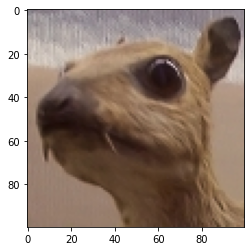

In [ ]:
#Identity
kernel = np.array([[0, 0, 0],
              [0, 1, 0],
              [0, 0, 0]])
img = cv2.imread('Vd-Orig.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
out = convolution_rgb(img, kernel)
plt.imshow(out)

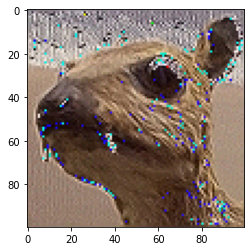

In [ ]:
#Sharpen
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
img = cv2.imread('Vd-Orig.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
out = convolution_rgb(img, kernel)
plt.imshow(out)

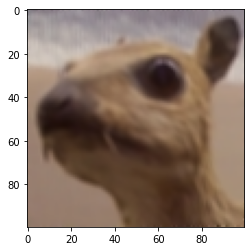

In [ ]:
#Box blur
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) /9
img = cv2.imread('Vd-Orig.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
out = convolution_rgb(img, kernel)
plt.imshow(out)

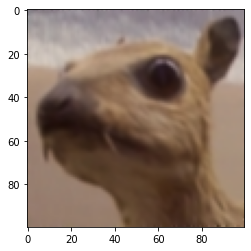

In [ ]:
#Gaussian blur 3x3
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) /16
img = cv2.imread('Vd-Orig.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
out = convolution_rgb(img, kernel)
plt.imshow(out)

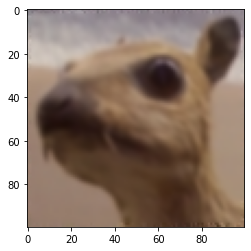

In [ ]:
#Gaussian blur 5x5
kernel = np.array([[1, 4, 6, 4, 1],
              [4, 16, 24, 16, 4],
              [6, 24, 36, 24, 6],
              [4, 16, 24, 16, 4],
              [1, 4, 6, 4, 1]]) /256
img = cv2.imread('Vd-Orig.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
out = convolution_rgb(img, kernel)
plt.imshow(out)

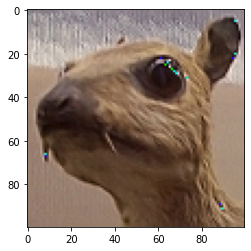

In [ ]:
#Unsharp masking 5x5
kernel = np.array([[1, 4, 6, 4, 1],
              [4, 16, 24, 16, 4],
              [6, 24, -476, 24, 6],
              [4, 16, 24, 16, 4],
              [1, 4, 6, 4, 1]]) /(-256)
img = cv2.imread('Vd-Orig.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
out = convolution_rgb(img, kernel)
plt.imshow(out)

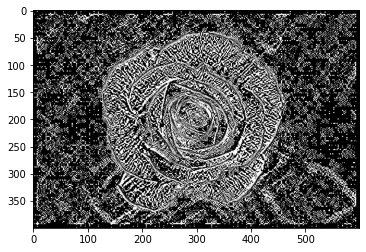

In [ ]:
#Edge detection
kernel = np.array([[1, 0, -1],
              [0, 0, 0],
              [-1, 0, 1]])
img = cv2.imread('rosa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out = convolution_gray(img, kernel)
plt.imshow(out, "gray")

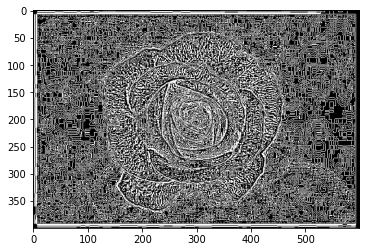

In [ ]:
#Edge detection
kernel = np.array([[0, -1, 0],
              [-1, 4, -1],
              [0, -1, 0]])
img = cv2.imread('rosa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out = convolution_gray(img, kernel)
plt.imshow(out, "gray")

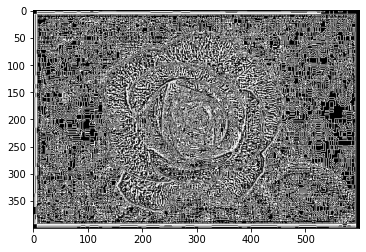

In [ ]:
#Edge detection
kernel = np.array([[-1, -1, -1],
              [-1, 8, -1],
              [-1, -1, -1]])
img = cv2.imread('rosa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out = convolution_gray(img, kernel)
plt.imshow(out, "gray")

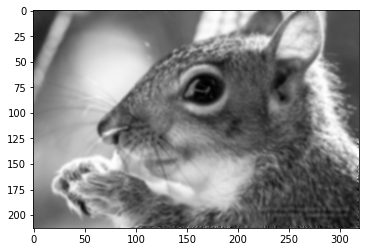

In [ ]:
#Unsharp masking 5x5. Based on Gaussian blur
kernel = np.array([[1, 4, 6, 4, 1],
              [4, 16, 24, 16, 4],
              [6, 24, 36, 24, 6],
              [4, 16, 24, 16, 4],
              [1, 4, 6, 4, 1]]) /256
img = cv2.imread('squirrel2.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out = convolution_gray(img, kernel)
plt.imshow(out, "gray")